<a href="https://colab.research.google.com/github/Aguspanale/modeladoContinuo/blob/main/clase_2_kepler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
np.set_printoptions(suppress=True)
import scipy.integrate as intgr
import matplotlib.pyplot as plt


In [ ]:
def equations(X, t, m1, m2, m3, k1, k2):# juguemos primero con un oscilador
    x1, x2, x3, v1, v2, v3 = X    # unpack variables
    dx1 = v1
    dx2 = v2
    dx3 = v3
    dv1 = -k1/m1 * x1 + k1/m1 * x2
    dv2 = k1/m2 * x1 - (k1+k2)/m2 * x2 + k2/m2 * x3
    dv3 = k2/m3 * x2 - k2/m3 * x3
    dXdt = [dx1, dx2, dx3, dv1, dv2, dv3]    # pack derivatives
    return dXdt

In [ ]:
# choose parameters
m1, m2, m3 = 1, 2, 3
k1, k2 = 2, 1

# specify initial values
x1i, x2i, x3i = 0, 0.4, -0.4
v1i, v2i, v3i = 0, 0, 0
init = [x1i, x2i, x3i, v1i, v2i, v3i]

T = 20.    # total time to solve for
time = np.arange(0, T, 0.1)    # time points to evaluate solution at

sol = intgr.odeint(equations, init, time, args=(m1, m2, m3, k1, k2))    # solve equations
X = sol[:,0:3]    # vector X consists of the first three components of the solution

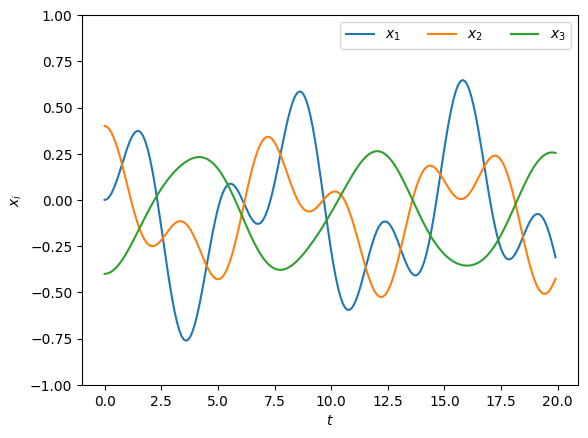

In [ ]:
plt.figure()
for i in range(3):
    plt.plot(time, X[:,i], label=f'$x_{i+1}$')
plt.ylim(-1, 1)
plt.xlabel(r'$t$')
plt.ylabel(r'$x_i$')
plt.legend(ncol=3)
plt.show()

In [ ]:
def planeta(X, t, G, m):
    x1, x2, v1, v2 = X    # unpack variables
    dx1 = v1
    dx2 = v2
    dv1 = -(G * x1)/(np.sqrt(x1**2+x2**2))**3
    dv2 = -(G * x2)/(np.sqrt(x1**2+x2**2))**3
    dXdt = [dx1, dx2, dv1, dv2]    # pack derivatives
    return dXdt

In [ ]:
# choose parameters
m=1
G=0.1

# specify initial values
x1i, x2i = 0.5, 0
v1i, v2i = 1, 1
init = [x1i, x2i, v1i, v2i]

T = 20.    # total time to solve for
time = np.arange(0, T, 0.1)    # time points to evaluate solution at

sol = intgr.odeint(planeta, init, time, args=(m, G))    # solve equations
X = sol[:,0:2]    # vector X consists of the first three components of the solution

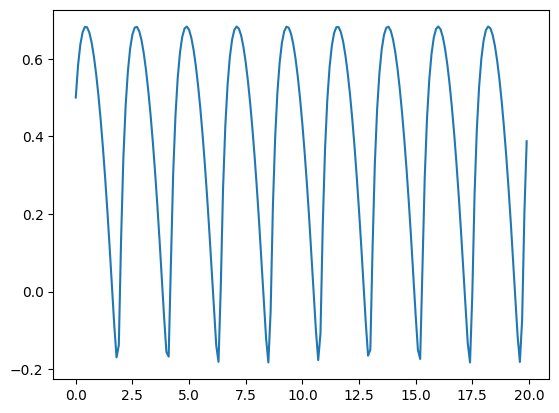

In [ ]:
plt.plot(time, sol[:,0])
plt.show()

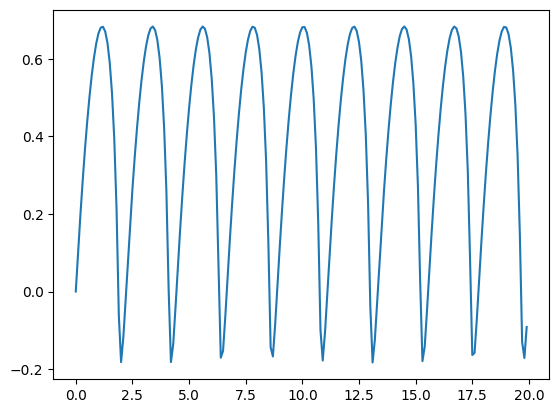

In [ ]:
plt.plot(time, sol[:,1])
plt.show()

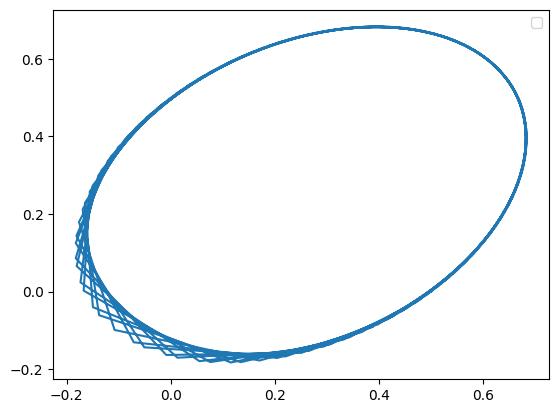

In [ ]:
plt.plot(sol[:,0], sol[:,1])
plt.legend()

In [ ]:
def planeta2(X, t, G, m):
    x1, x2, x3, x4, v1, v2, v3, v4 = X    # unpack variables
    dx1 = v1
    dx2 = v2
    dx3 = v3
    dx4 = v4
    dv1 = -(G * (x1-x3))/(np.sqrt((x1-x3)**2+(x2-x4)**2))**3
    dv2 = -(G * (x2-x4))/(np.sqrt((x1-x3)**2+(x2-x4)**2))**3
    dv3 = (G * (x1-x3))/(np.sqrt((x1-x3)**2+(x2-x4)**2))**3
    dv4 = (G * (x2-x4))/(np.sqrt((x1-x3)**2+(x2-x4)**2))**3
    dXdt = [dx1, dx2, dx3, dx4, dv1, dv2, dv3, dv4]    # pack derivatives
    return dXdt

In [ ]:
# choose parameters
m=1
G=0.1

# specify initial values
x1i, x2i, x3i, x4i = 0.5, 0, 0, 0
v1i, v2i, v3i, v4i = 1, 1, -1, 0
init = [x1i, x2i, x3i, x4i, v1i, v2i, v3i, v4i]

T = 20.    # total time to solve for
time = np.arange(0, T, 0.1)    # time points to evaluate solution at

sol = intgr.odeint(planeta2, init, time, args=(m, G))    # solve equations
X = sol[:,0:4]    # vector X consists of the first three components of the solution

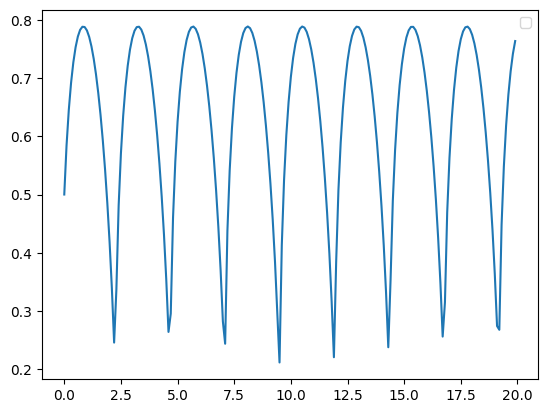

In [ ]:
plt.plot(time, sol[:,0])
plt.legend()

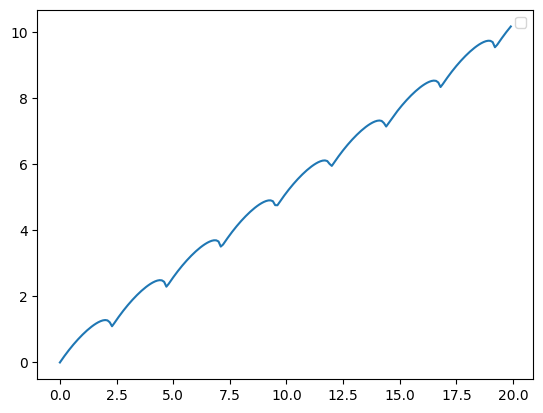

In [ ]:
plt.plot(time, sol[:,1])
plt.legend()

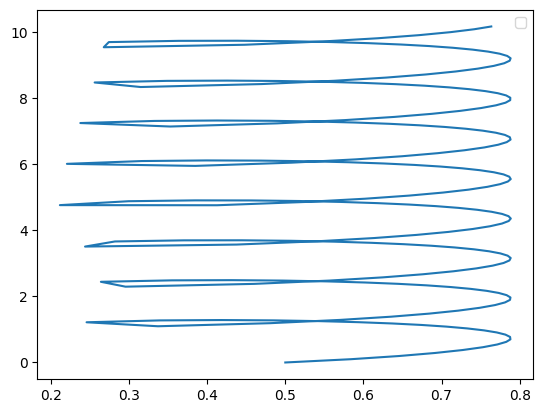

In [ ]:
plt.plot(sol[:, 0], sol[:,1])
plt.legend()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
def planeta3(X, t, G, m):
    x1, x2, x3, x4, x5, x6, x7, x8, x9, v1, v2, v3, v4, v5, v6, v7, v8, v9= X    # unpack variables
    dx1 = v1
    dx2 = v2
    dx3= v3
    dx4 = v4
    dx5 = v5
    dx6= v6
    dx7 = v7
    dx8 = v8
    dx9= v9
    dv1 = -(G * (x1-x4))/(np.sqrt((x1-x4)**2+(x2-x5)**2+(x3-x6)**2))**3-(G * (x1-x7))/(np.sqrt((x1-x7)**2+(x2-x8)**2+(x3-x9)**2))**3
    dv2 = -(G * (x2-x5))/(np.sqrt((x1-x4)**2+(x2-x5)**2+(x3-x6)**2))**3-(G * (x2-x8))/(np.sqrt((x1-x7)**2+(x2-x8)**2+(x3-x9)**2))**3
    dv3 = -(G * (x3-x6))/(np.sqrt((x1-x4)**2+(x2-x5)**2+(x3-x6)**2))**3-(G * (x3-x9))/(np.sqrt((x1-x7)**2+(x2-x8)**2+(x3-x9)**2))**3
    dv4 = -(G * (x4-x1))/(np.sqrt((x1-x4)**2+(x2-x5)**2+(x3-x6)**2))**3-(G * (x4-x7))/(np.sqrt((x4-x7)**2+(x5-x8)**2+(x6-x9)**2))**3
    dv5 = -(G * (x5-x2))/(np.sqrt((x1-x4)**2+(x2-x5)**2+(x3-x6)**2))**3-(G * (x5-x8))/(np.sqrt((x4-x7)**2+(x5-x8)**2+(x6-x9)**2))**3
    dv6 = -(G * (x6-x3))/(np.sqrt((x1-x4)**2+(x2-x5)**2+(x3-x6)**2))**3-(G * (x6-x9))/(np.sqrt((x4-x7)**2+(x5-x8)**2+(x6-x9)**2))**3
    dv7 = -(G * (x7-x4))/(np.sqrt((x7-x4)**2+(x8-x5)**2+(x9-x6)**2))**3-(G * (x7-x1))/(np.sqrt((x1-x7)**2+(x2-x8)**2+(x3-x9)**2))**3
    dv8 = -(G * (x8-x5))/(np.sqrt((x7-x4)**2+(x8-x5)**2+(x9-x6)**2))**3-(G * (x8-x2))/(np.sqrt((x1-x7)**2+(x2-x8)**2+(x3-x9)**2))**3
    dv9 = -(G * (x9-x6))/(np.sqrt((x7-x4)**2+(x8-x5)**2+(x9-x6)**2))**3-(G * (x9-x3))/(np.sqrt((x1-x7)**2+(x2-x8)**2+(x3-x9)**2))**3

    dXdt = [dx1, dx2, dx3, dx4, dx5, dx6, dx7, dx8, dx9, dv1, dv2, dv3, dv4, dv5, dv6, dv7, dv8, dv9]    # pack derivatives
    return dXdt

In [ ]:
# choose parameters
m=1
G=0.1

# specify initial values
x1i, x2i, x3i, x4i, x5i, x6i, x7i, x8i, x9i = 0.5, 0, 0, 0, 0.5, 0, 0, 0, 0.5
v1i, v2i, v3i, v4i, v5i, v6i, v7i, v8i, v9i = 1, 1, -1, 0, 0, 0, 0.5, 0, 0.5
init = [x1i, x2i, x3i, x4i, x5i, x6i, x7i, x8i, x8i, v1i, v2i, v3i, v4i, v5i, v6i, v7i, v8i, v9i]

T = 20.    # total time to solve for
time = np.arange(0, T, 0.1)    # time points to evaluate solution at

sold = intgr.odeint(planeta3, init, time, args=(m, G))    # solve equations
X=sold[0:3]
plt.plot(time, sold[:,0])
plt.legend()


/usr/local/lib/python3.10/dist-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [ ]:
plt.plot(time, sold[:,1])
plt.legend()

In [ ]:
plt.plot(sold[:,0], sold[:,1])
plt.legend()

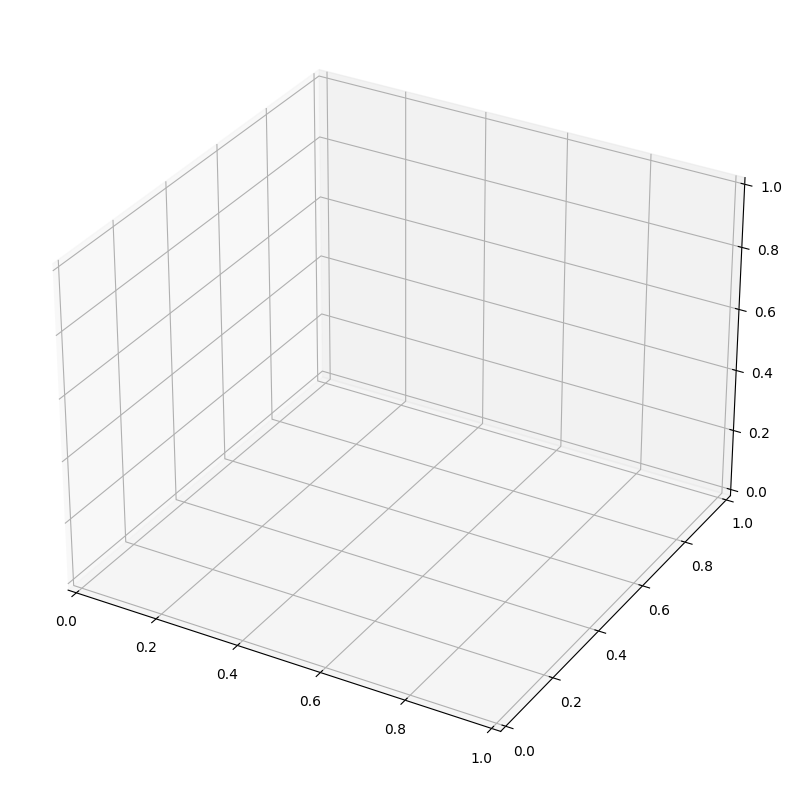

In [ ]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
plt.show()

In [ ]:
%matplotlib notebook

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()


ax.plot3D(sold[:,1], sold[:,2], sold[:,2])
ax.set_title('3D Parametric Plot')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('t', labelpad=20)

plt.show()

<IPython.core.display.Javascript object>